<a href="https://colab.research.google.com/github/Bertrand-gbt/Projet-Fouilles-de-donn-es/blob/master/Projet_FDECfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nous allons traiter les données sur Python en utilisant SciKit-Learn.

# 1. Importation des données

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Nous importons les données grâce à pandas.

In [0]:
data = pd.read_csv('/content/donnees-mod.csv' )
print(data.shape)
data.head()

(15375, 34)


,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,IDENTIFIANTPLU,INTITULEPROTECTIONPLU,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,RAISONDEPLANTATION,REMARQUES,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAITEMENTCHENILLES,TRAVAUXPRECONISESDIAG,TROTTOIR,TYPEIMPLANTATIONPLU,VARIETE,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014,2019,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,Alnus,?,?,Arbre davenir normal,plus de 20 ans,Remplacement,0,ESP151,Arbre de voirie,Arbre jeune,Arbre jeune,?,Controle,non,?,?,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013,?,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,Platanus,?,?,Arbre davenir normal,plus de 20 ans,?,0,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,?,?,non,?,?,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
2,3,2004,?,2014,ESP26205,ESP635,Pl R Frappat ang Eaux Claires,10 à 20 cm,grandiflora,passages fréquents ou arrêts,Magnolia,?,?,Arbre davenir normal,plus de 20 ans,?,0,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre adulte,?,Controle,oui,?,?,vigoureux,1.913087e+06,4.223524e+06,0,0,0,0,0
3,2,2004,2014,2014,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,Sophora,?,?,Arbre davenir normal,plus de 20 ans,?,1,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,?,Taille mise en sécurité,oui,?,?,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013,?,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,Fraxinus,?,?,Arbre davenir normal,plus de 20 ans,?,0,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,?,?,oui,?,?,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0


In [0]:
data.describe(include='all')

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,IDENTIFIANTPLU,INTITULEPROTECTIONPLU,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,RAISONDEPLANTATION,REMARQUES,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAITEMENTCHENILLES,TRAVAUXPRECONISESDIAG,TROTTOIR,TYPEIMPLANTATIONPLU,VARIETE,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
count,15375.000000,15375.000000,15375,15375,15375,15375,15375,15375,15375,15375,15375,15375,15375,15375,15375,15375,15375.000000,15375,15375,15375,15375,15375,15375,15375,15375,15375,15375,1.537500e+04,1.537500e+04,15375.000000,15375.000000,15375.000000,15375.000000,15375.000000
unique,NaN,NaN,6,12,15375,1141,1141,20,227,4,107,20,4,6,5,3,NaN,4,4,4,4,4,16,2,5,90,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2015,?,ESP17381,ESP995,Prc Echangeurs Bastion St Roch,10 à 20 cm,acerifolia,passages fréquents et arrêts fréquents,Platanus,?,?,Arbre davenir normal,plus de 20 ans,?,NaN,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,?,Taille formation et mise au gabarit,non,?,?,vigoureux,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6634,4511,1,211,211,4221,2864,12164,2982,15014,15014,11716,11371,15145,NaN,7235,7235,13250,12290,14287,4616,10621,15014,13212,12449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.680455,2004.927610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.273106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.914222e+06,4.223314e+06,0.325268,0.060423,0.215610,0.046959,0.133984
std,1.678015,2.604701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.445569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.001492e+03,1.319505e+03,0.468490,0.238276,0.411258,0.211559,0.340646
min,1.000000,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.911907e+06,4.220467e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.913352e+06,4.222201e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.914340e+06,4.223104e+06,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.915048e+06,4.224558e+06,1.000000,0.000000,0.000000,0.000000,0.000000


# 2. Traitement des données

## 2.1. Traitement des valeurs manquantes

In [0]:
data = data.replace('?',np.nan)

missing_values = data.isnull().sum()
missing_values

ADR_SECTEUR                       0
ANNEEDEPLANTATION                 0
ANNEEREALISATIONDIAGNOSTIC        8
ANNEETRAVAUXPRECONISESDIAG     4511
CODE                              0
CODE_PARENT                       0
CODE_PARENT_DESC                  0
DIAMETREARBREAUNMETRE            67
ESPECE                         1018
FREQUENTATIONCIBLE                1
GENRE_BOTA                        0
IDENTIFIANTPLU                15014
INTITULEPROTECTIONPLU         15014
NOTEDIAGNOSTIC                   40
PRIORITEDERENOUVELLEMENT        127
RAISONDEPLANTATION            15145
REMARQUES                         0
SOUS_CATEGORIE                    0
SOUS_CATEGORIE_DESC               0
STADEDEDEVELOPPEMENT             51
STADEDEVELOPPEMENTDIAG           13
TRAITEMENTCHENILLES           14287
TRAVAUXPRECONISESDIAG          4525
TROTTOIR                          0
TYPEIMPLANTATIONPLU           15014
VARIETE                       13212
VIGUEUR                          11
coord_x                     

Nous allons visualiser ce manque de valeurs pour les différents attributs.

Nous ragardons la répartition de ces valeurs manquantes en fonction des attributs.

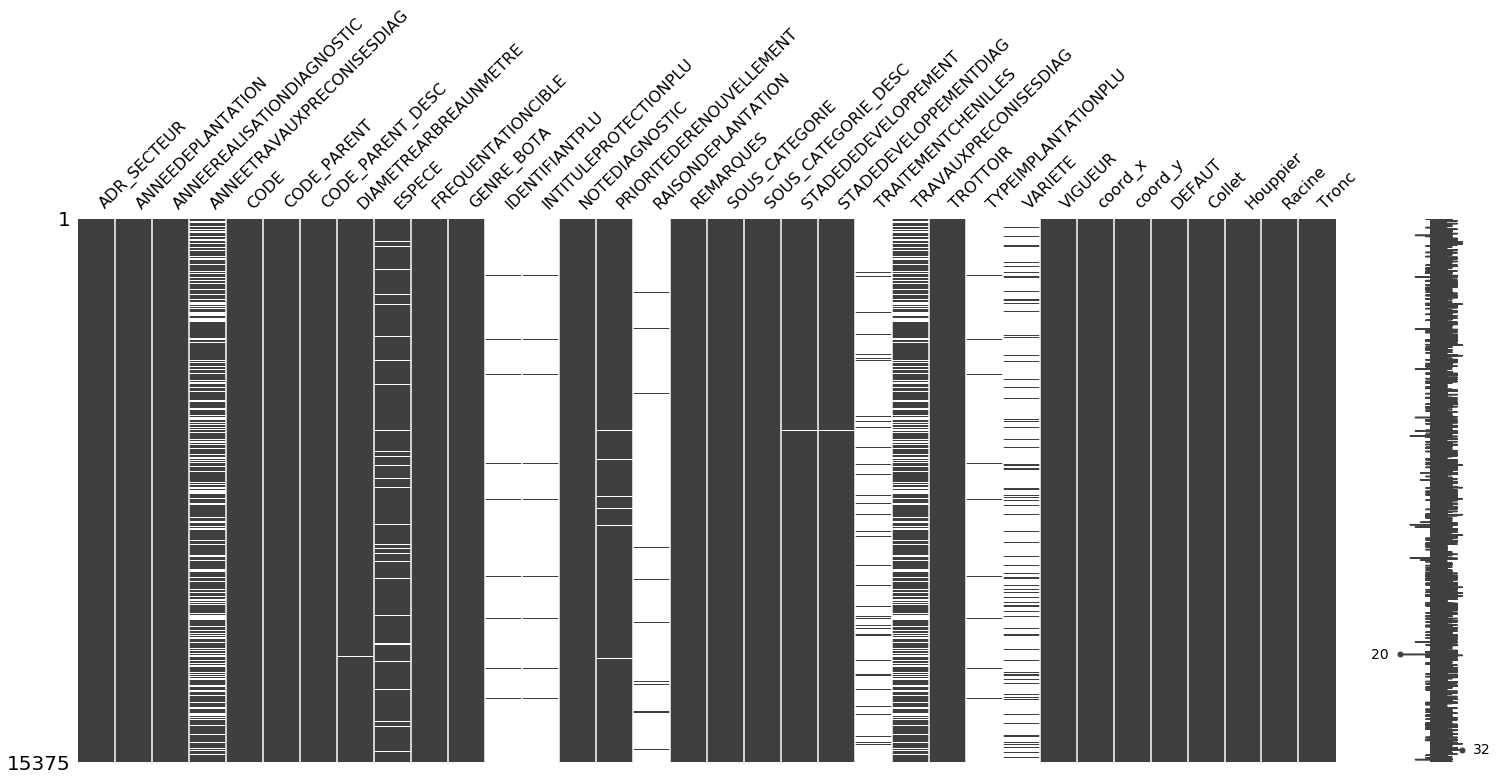

In [0]:
import missingno as msno
#%matplotlib inline
msno.matrix(data)

Ici nous visualisons l'histogramme du nombre de données non manquante par rapport aux attributs.

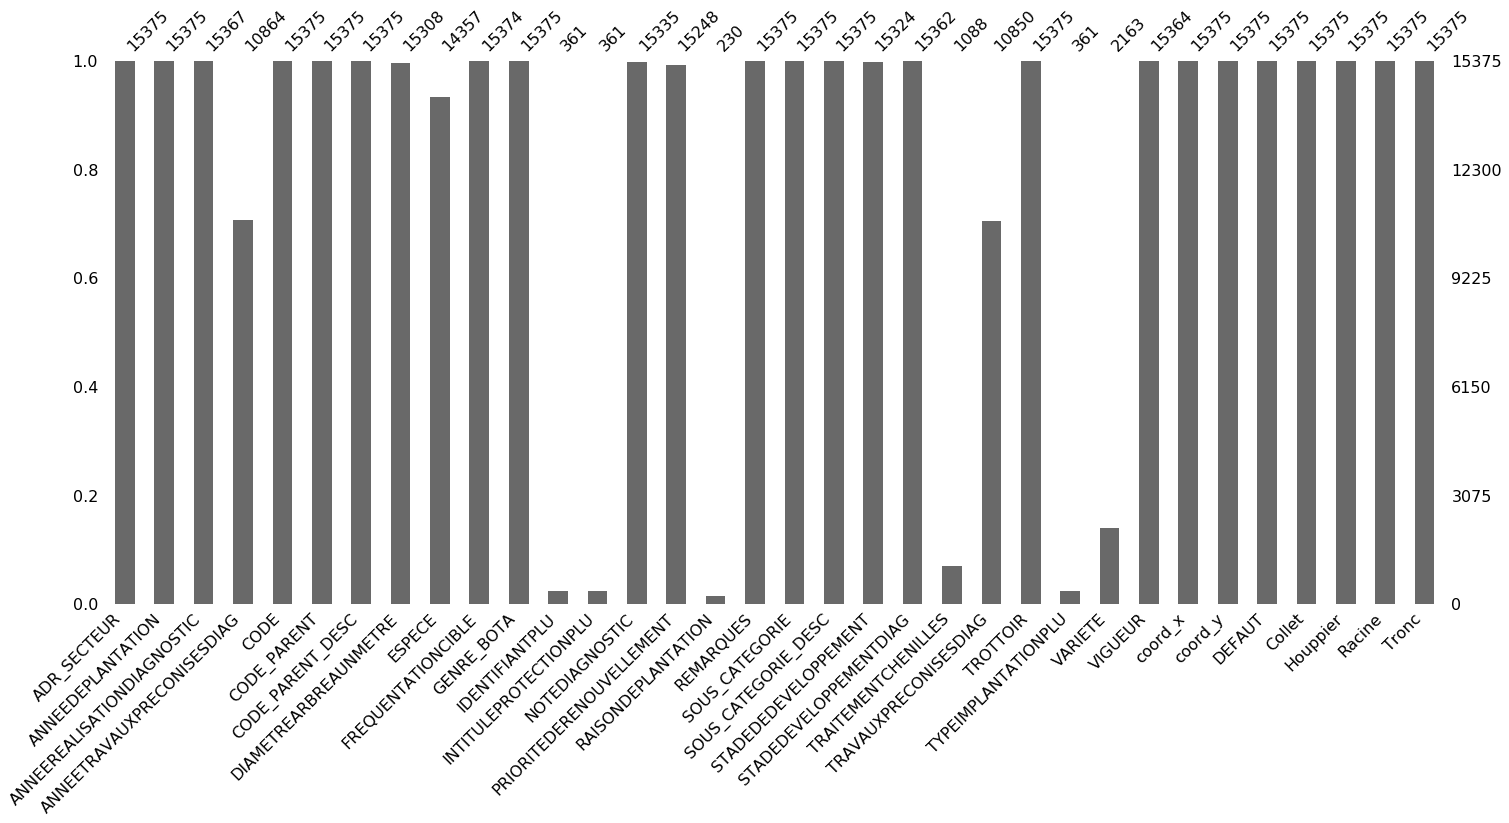

In [0]:
msno.bar(data)

Cette figure représente la mesure de corrélation de la nullité, c'est-à-dire dans quelle mesure la présence ou l'absence d'une variable affecte la présence d'une autre.

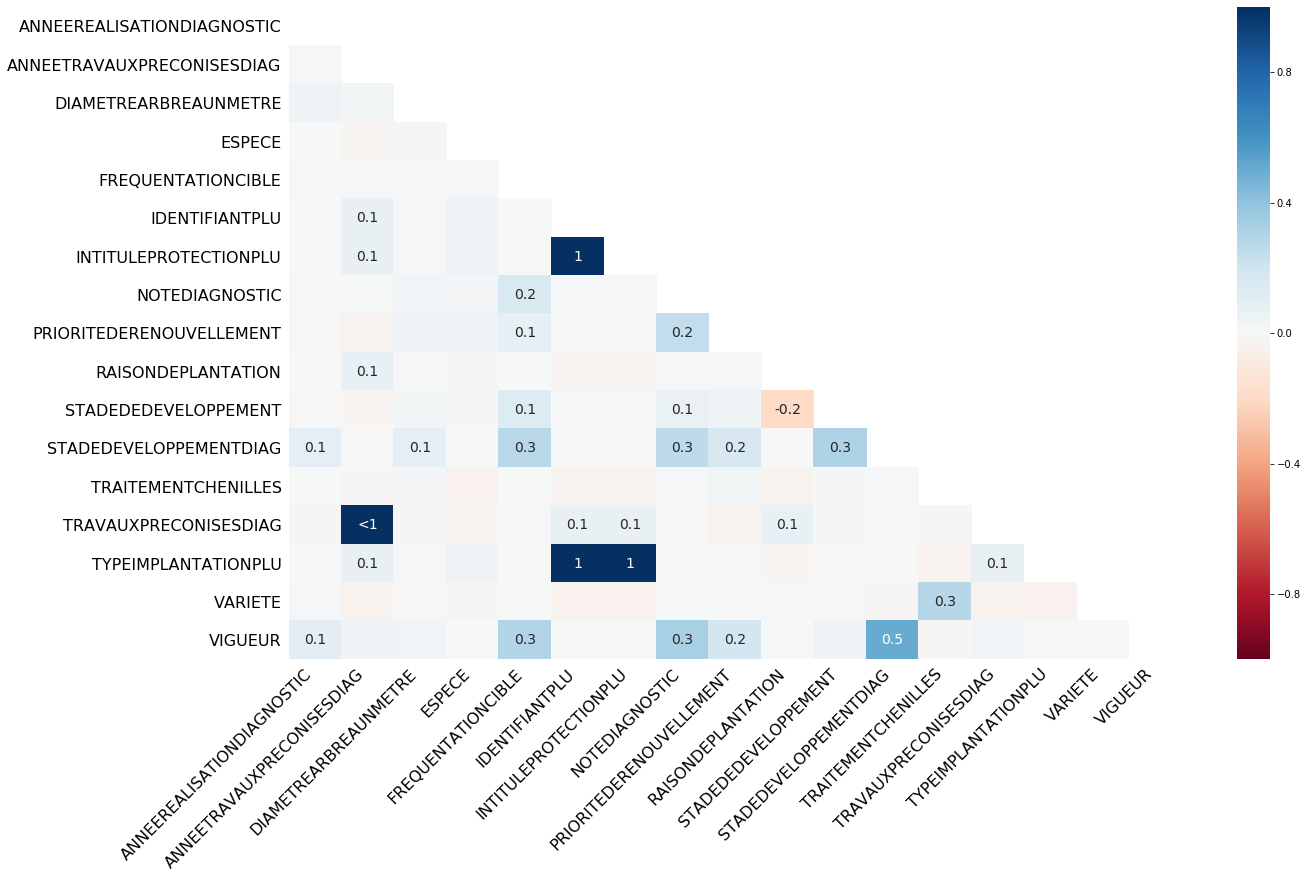

In [0]:
msno.heatmap(data)

On enlève les attributs ayant trop de valeurs manquantes pour être utile pour l'étude. On choisit d'enlever les attributs avec plus de 10000 valeurs manquantes.

In [0]:
data = data.drop(columns=['ANNEETRAVAUXPRECONISESDIAG','IDENTIFIANTPLU','INTITULEPROTECTIONPLU','CODE','CODE_PARENT_DESC','RAISONDEPLANTATION','TRAITEMENTCHENILLES','TYPEIMPLANTATIONPLU','STADEDEDEVELOPPEMENT','TRAVAUXPRECONISESDIAG','VARIETE'])
data.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,CODE_PARENT,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,REMARQUES,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,STADEDEVELOPPEMENTDIAG,TROTTOIR,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014,ESP385,10 à 20 cm,cordata,passages fréquents ou arrêts,Alnus,Arbre davenir normal,plus de 20 ans,0,ESP151,Arbre de voirie,Arbre jeune,non,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013,ESP116,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,Platanus,Arbre davenir normal,plus de 20 ans,0,ESP151,Arbre de voirie,Arbre adulte,non,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
2,3,2004,NaN,ESP635,10 à 20 cm,grandiflora,passages fréquents ou arrêts,Magnolia,Arbre davenir normal,plus de 20 ans,0,ESP174,Arbre despaces ouverts,Arbre adulte,oui,vigoureux,1.913087e+06,4.223524e+06,0,0,0,0,0
3,2,2004,2014,ESP109,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,Sophora,Arbre davenir normal,plus de 20 ans,1,ESP151,Arbre de voirie,Arbre adulte,oui,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013,ESP194,20 à 30 cm,americana,passages fréquents et arrêts fréquents,Fraxinus,Arbre davenir normal,plus de 20 ans,0,ESP151,Arbre de voirie,Arbre adulte,oui,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0


## 2.2. Transformation des données avant l'utilisation

In [0]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")

data = imp.fit_transform(data)

data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,5,2014,2014,ESP385,10 à 20 cm,cordata,passages fréquents ou arrêts,Alnus,Arbre davenir normal,plus de 20 ans,0,ESP151,Arbre de voirie,Arbre jeune,non,vigoureux,1.91537e+06,4.22284e+06,0,0,0,0,0
1,3,2004,2013,ESP116,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,Platanus,Arbre davenir normal,plus de 20 ans,0,ESP151,Arbre de voirie,Arbre adulte,non,vigoureux,1.91325e+06,4.22253e+06,0,0,0,0,0
2,3,2004,2015,ESP635,10 à 20 cm,grandiflora,passages fréquents ou arrêts,Magnolia,Arbre davenir normal,plus de 20 ans,0,ESP174,Arbre despaces ouverts,Arbre adulte,oui,vigoureux,1.91309e+06,4.22352e+06,0,0,0,0,0
3,2,2004,2014,ESP109,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,Sophora,Arbre davenir normal,plus de 20 ans,1,ESP151,Arbre de voirie,Arbre adulte,oui,vigoureux,1.91419e+06,4.22428e+06,1,0,1,1,0
4,1,2004,2013,ESP194,20 à 30 cm,americana,passages fréquents et arrêts fréquents,Fraxinus,Arbre davenir normal,plus de 20 ans,0,ESP151,Arbre de voirie,Arbre adulte,oui,vigoureux,1.91297e+06,4.22521e+06,0,0,0,0,0


In [0]:
# DIAMETREARBREAUNMETRE
data=data.replace(['0 à 10 cm','10 à 20 cm', '20 à 30 cm', '30 à 40 cm', '40 à 50 cm', '50 à 60 cm', '60 à 70 cm','70 à 80 cm', '80 à 90 cm', '90 à 100 cm','100 à 110 cm','110 à 120 cm',  '120 à 130 cm','130 à 140 cm', '140 à 150 cm', '150 à 160 cm', '160 à 170 cm', '170 à 180 cm','180 à 190 cm'],[i for i in range(19)])
# FREQUENTATIONCIBLE
data=data.replace(['quelques passages', 'passages fréquents ou arrêts', 'passages fréquents et arrêts fréquents' ],[i for i in range(3)])
# NOTEDIAGNOSTIC
data=data.replace(['Arbre à abattre immédiatement', 'Arbre à abattre dans les 5 ans', 'Arbre à abattre dans les 10 ans', 'Arbre davenir incertain', 'Arbre davenir normal'],[i for i in range(5)])
# PRIORITEDERENOUVELLEMENT
data=data.replace(['de 1 à 5 ans','de 6 à 10 ans', 'de 11 à 20 ans','plus de 20 ans' ],[i for i in range(4)])
# STADEDEVELOPPEMENTDIAG
data=data.replace(['Arbre jeune', 'Arbre adulte', 'Arbre vieillissant'],[i for i in range(3)])
# TROTTOIR
data=data.replace(['non', 'oui'],[0,1])
# VIGUEUR
data=data.replace(['vigoureux', 'vigueur intermédiaire', 'vieillissement dépérissement'],[i for i in range(3)])
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,5,2014,2014,ESP385,1,cordata,1,Alnus,4,3,0,ESP151,Arbre de voirie,0,0,0,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013,ESP116,3,acerifolia,2,Platanus,4,3,0,ESP151,Arbre de voirie,1,0,0,1.913250e+06,4.222531e+06,0,0,0,0,0
2,3,2004,2015,ESP635,1,grandiflora,1,Magnolia,4,3,0,ESP174,Arbre despaces ouverts,1,1,0,1.913087e+06,4.223524e+06,0,0,0,0,0
3,2,2004,2014,ESP109,4,japonica,2,Sophora,4,3,1,ESP151,Arbre de voirie,1,1,0,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013,ESP194,2,americana,2,Fraxinus,4,3,0,ESP151,Arbre de voirie,1,1,0,1.912975e+06,4.225210e+06,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15370,3,2004,2013,ESP84,0,acerifolia,2,Pinus,4,3,0,ESP174,Arbre despaces ouverts,0,0,0,1.912985e+06,4.222215e+06,0,0,0,0,0
15371,4,2004,2014,ESP1023,4,acerifolia,2,Platanus,4,3,0,ESP151,Arbre de voirie,1,0,0,1.913534e+06,4.223000e+06,0,0,0,0,0
15372,1,2004,2013,ESP1277,1,acerifolia,2,Fraxinus,4,3,0,ESP151,Arbre de voirie,1,0,0,1.913037e+06,4.225100e+06,0,0,0,0,0
15373,4,2004,2014,ESP877,1,styraciflua,2,Liquidambar,4,3,1,ESP151,Arbre de voirie,1,1,0,1.914695e+06,4.222890e+06,0,0,0,0,0


In [0]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto', sparse=False, handle_unknown='error')

A1 = np.array(data[[0,1,2,4]])
A2 = data [[3,5]]
encoder.fit(A2)
A2 = encoder.transform(A2)
A3 = np.array(data[[6]])
A4 = data [[7]]
encoder.fit(A4)
A4 = encoder.transform(A4)
A5 = np.array(data[[8,9,10]])
A6 = data [[11]]
encoder.fit(A6)
A6 = encoder.transform(A6)
A7 = np.array(data[[13]])
A8 = np.array(data[[14,15,16,17]])

test_u = np.concatenate((A1,A2,A3,A4,A5,A6,A7,A8), axis=1)
test_u

array([[5, 2014, '2014', ..., 0.0, 1915370.6220599997, 4222836.77466],
       [3, 2004, '2013', ..., 0.0, 1913250.43825, 4222531.23078],
       [3, 2004, '2015', ..., 0.0, 1913086.9763900002, 4223524.47264],
       ...,
       [1, 2004, '2013', ..., 0.0, 1913037.4915, 4225099.55784],
       [4, 2004, '2014', ..., 0.0, 1914694.81231, 4222889.78725],
       [1, 2014, '2014', ..., 0.0, 1911906.64842, 4226533.85288]],
      dtype=object)

# 3. Analyse des données

## Défi 1 :

### Tâche supervisée 1 : classification uni-label

#### Méthode random forest :

Le mixte des 2 méthodes ne nous donne pas un score plus important que les méthodes utilisées séparément.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

A1 = test_u
y = np.array(data[18])

clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, A1, y, cv=5)
print('Score de notre Random Forest Classifier pour un défaut : ',scores.mean())

Score de notre Random Forest Classifier pour un défaut :  0.8537235772357723


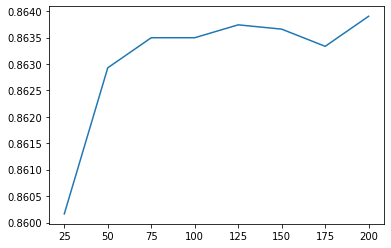

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(A1,y,test_size=0.2)

model = RandomForestClassifier(max_depth=None,min_samples_split=2, random_state=0)
k=np.array(range (25,201,25))

train_score, val_score = validation_curve(model, Xm_train, Ym_train, 'n_estimators', k, cv=5)

plt.plot(k,val_score.mean(axis=1))

On remarque que l'augmentation n'est pas significative.

Calculons maintenant l'erreur entre le test set et le predicted set.

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

clf = clf.fit(Xm_train, Ym_train)
Ym_pred = clf.predict(Xm_test)

print('Erreur quadratique moyenne : %.4f' % mean_squared_error(Ym_test,Ym_pred))
print('Erreur absolue moyenne : %.4f' % mean_absolute_error(Ym_test,Ym_pred))

Erreur quadratique moyenne : 0.1450
Erreur absolue moyenne : 0.1450


Maintenant passons au calcul de la matrice de confusion pour la prédiction d'un défaut.

In [23]:
from sklearn.metrics import confusion_matrix

CM00=confusion_matrix(Ym_test, Ym_pred)
print('\nNous obtenons une précision, calculée avec la matrice de confusion,  de', CM00[0,0]/(CM00[0,0]+CM00[0,1]), 'et un rappel de', CM00[0,0]/(CM00[0,0]+CM00[1,0]),'.\n' )


Nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9408842523596622 et un rappel de 0.8508535489667565 .



#### Méthode boosting :

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
A1 = test_u
y = np.array(data[18])
#A1, y = make_classification(n_samples=1000, n_features=4,
#                           n_informative=2, n_redundant=0,
#                           random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=50, random_state=0)
score = cross_val_score(clf, A1, y, cv=5)
#clf.fit(A1,y)

print('Score de notre boosting Classifier pour un défaut : ',score.mean())

Score de notre boosting Classifier pour un défaut :  0.8463089430894308


In [0]:
Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(A1,y,test_size=0.2)

model = AdaBoostClassifier( random_state=0)
k=np.array(range (25,201,25))

train_score, val_score = validation_curve(model, Xm_train, Ym_train, 'n_estimators', k, cv=5)

plt.plot(k,val_score.mean(axis=1))

In [25]:
Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(A1,y,test_size=0.2)

clf = clf.fit(Xm_train, Ym_train)
Ym_pred = clf.predict(Xm_test)

print('Erreur quadratique moyenne : %.4f' % mean_squared_error(Ym_test,Ym_pred))
print('Erreur absolue moyenne : %.4f' % mean_absolute_error(Ym_test,Ym_pred))

Erreur quadratique moyenne : 0.1593
Erreur absolue moyenne : 0.1593


In [26]:
CM00=confusion_matrix(Ym_test, Ym_pred)
print('\nNous obtenons une précision, calculée avec la matrice de confusion,  de', CM00[0,0]/(CM00[0,0]+CM00[0,1]), 'et un rappel de', CM00[0,0]/(CM00[0,0]+CM00[1,0]),'.\n' )


Nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9312320916905444 et un rappel de 0.8493031358885017 .



### Tâche supervisée 2 : classification multi-label

#### Méthode random forest :

Calculons dans un premier temps le score de chaque Random Forest pour chaque endroit où il peut y avoir un défaut.

In [27]:
A1 = test_u

y1=np.array(data[19])

y2=np.array(data[20])

y3=np.array(data[21])

y4=np.array(data[22])

clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)

scores1 = cross_val_score(clf, A1, y1, cv=5)

scores2 = cross_val_score(clf, A1, y2, cv=5)

scores3 = cross_val_score(clf, A1, y3, cv=5)

scores4 = cross_val_score(clf, A1, y4, cv=5)

print(' Voici le score pour le collet : ',scores1.mean(),'\n Voici le score pour le Houppier : ',scores2.mean(),'\n Voici le score pour la Racine : ', scores3.mean(),'\n Voici le score pour le Tronc : ', scores4.mean())

 Voici le score pour le collet :  0.944780487804878 
 Voici le score pour le Houppier :  0.8753170731707316 
 Voici le score pour la Racine :  0.9546016260162601 
 Voici le score pour le Tronc :  0.8851382113821138


Calculons l'erreur entre chacun des Test set et Predicted set associer à un endroit de défaut possible.

In [28]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(A1,y1,test_size=0.2)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(A1,y2,test_size=0.2)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(A1,y3,test_size=0.2)
X4_train, X4_test, Y4_train, Y4_test = train_test_split(A1,y4,test_size=0.2)

clf1 = clf.fit(X1_train, Y1_train)
Y1_pred = clf1.predict(X1_test)

clf2 = clf.fit(X2_train, Y2_train)
Y2_pred = clf2.predict(X2_test)

clf3 = clf.fit(X3_train, Y3_train)
Y3_pred = clf3.predict(X3_test)

clf4 = clf.fit(X4_train, Y4_train)
Y4_pred = clf4.predict(X4_test)

print('Erreur absolue moyenne (Collet) : %.4f' % mean_absolute_error(Y1_test,Y1_pred))
print('Erreur absolue moyenne (Houppier) : %.4f' % mean_absolute_error(Y2_test,Y2_pred))
print('Erreur absolue moyenne (Racine) : %.4f' % mean_absolute_error(Y3_test,Y3_pred))
print('Erreur absolue moyenne (Tronc) : %.4f' % mean_absolute_error(Y4_test,Y4_pred))

Erreur absolue moyenne (Collet) : 0.0585
Erreur absolue moyenne (Houppier) : 0.1213
Erreur absolue moyenne (Racine) : 0.0429
Erreur absolue moyenne (Tronc) : 0.1161


Faisons de même que pour la classification uni-label avec le calcul des matrices de confusions, afin de déterminer les précisions et rappels des différentes prédictions.

In [29]:
CM1=confusion_matrix(Y1_test, Y1_pred)
CM2=confusion_matrix(Y2_test, Y2_pred)
CM3=confusion_matrix(Y3_test, Y3_pred)
CM4=confusion_matrix(Y4_test, Y4_pred)

print('Pour le collet : nous obtenons une précision, calculée avec la matrice de confusion,  de', CM1[0,0]/(CM1[0,0]+CM1[0,1]),
      'et un rappel de', CM1[0,0]/(CM1[0,0]+CM1[1,0]),'.' )
print('\nPour le houppier : nous obtenons une précision, calculée avec la matrice de confusion,  de', CM2[0,0]/(CM2[0,0]+CM2[0,1]),
      'et un rappel de', CM2[0,0]/(CM2[0,0]+CM2[1,0]),'.' )
print('\nPour la racine : nous obtenons une précision, calculée avec la matrice de confusion,  de', CM3[0,0]/(CM3[0,0]+CM3[0,1]),
      'et un rappel de', CM3[0,0]/(CM3[0,0]+CM3[1,0]),'.' )
print('\nPour le tronc : nous obtenons une précision, calculée avec la matrice de confusion,  de', CM4[0,0]/(CM4[0,0]+CM4[0,1]),
      'et un rappel de', CM4[0,0]/(CM4[0,0]+CM4[1,0]),'.' )

Pour le collet : nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9895543175487466 et un rappel de 0.9498663101604278 .

Pour le houppier : nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9525 et un rappel de 0.8982318271119842 .

Pour la racine : nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9914324880054832 et un rappel de 0.9643333333333334 .

Pour le tronc : nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9660761402186204 et un rappel de 0.9056537102473499 .


#### Méthode boosting :

Calculons dans un premier temps le score de chaque Adaboost pour chaque endroit où il peut y avoir un défaut.

In [30]:
A1 = test_u

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

y1=np.array(data[19])

y2=np.array(data[20])

y3=np.array(data[21])

y4=np.array(data[22])

clf = clf = AdaBoostClassifier(n_estimators=10, random_state=0)

scores1 = cross_val_score(clf, A1, y1, cv=5)

scores2 = cross_val_score(clf, A1, y2, cv=5)

scores3 = cross_val_score(clf, A1, y3, cv=5)

scores4 = cross_val_score(clf, A1, y4, cv=5)

print(' Voici le score pour le collet : ',scores1.mean(),'\n Voici le score pour le Houppier : ',scores2.mean(),'\n Voici le score pour la Racine : ', scores3.mean(),'\n Voici le score pour le Tronc : ', scores4.mean())

 Voici le score pour le collet :  0.9396422764227642 
 Voici le score pour le Houppier :  0.846048780487805 
 Voici le score pour la Racine :  0.9524552845528456 
 Voici le score pour le Tronc :  0.8759024390243901


Calculons l'erreur entre chacun des Test set et Predicted set associer à un endroit de défaut possible.

In [31]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(A1,y1,test_size=0.2)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(A1,y2,test_size=0.2)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(A1,y3,test_size=0.2)
X4_train, X4_test, Y4_train, Y4_test = train_test_split(A1,y4,test_size=0.2)

clf1 = clf.fit(X1_train, Y1_train)
Y1_pred = clf1.predict(X1_test)

clf2 = clf.fit(X2_train, Y2_train)
Y2_pred = clf2.predict(X2_test)

clf3 = clf.fit(X3_train, Y3_train)
Y3_pred = clf3.predict(X3_test)

clf4 = clf.fit(X4_train, Y4_train)
Y4_pred = clf4.predict(X4_test)

print('Erreur absolue moyenne (Collet) : %.4f' % mean_absolute_error(Y1_test,Y1_pred))
print('Erreur absolue moyenne (Houppier) : %.4f' % mean_absolute_error(Y2_test,Y2_pred))
print('Erreur absolue moyenne (Racine) : %.4f' % mean_absolute_error(Y3_test,Y3_pred))
print('Erreur absolue moyenne (Tronc) : %.4f' % mean_absolute_error(Y4_test,Y4_pred))

Erreur absolue moyenne (Collet) : 0.0615
Erreur absolue moyenne (Houppier) : 0.1545
Erreur absolue moyenne (Racine) : 0.0465
Erreur absolue moyenne (Tronc) : 0.1249


Faisons de même que pour la classification uni-label avec le calcul des matrices de confusions, afin de déterminer les précisions et rappels des différentes prédictions.

In [32]:
CM1=confusion_matrix(Y1_test, Y1_pred)
CM2=confusion_matrix(Y2_test, Y2_pred)
CM3=confusion_matrix(Y3_test, Y3_pred)
CM4=confusion_matrix(Y4_test, Y4_pred)

print('Pour le collet : nous obtenons une précision, calculée avec la matrice de confusion,  de', CM1[0,0]/(CM1[0,0]+CM1[0,1]),
      'et un rappel de', CM1[0,0]/(CM1[0,0]+CM1[1,0]),'.' )
print('\nPour le houppier : nous obtenons une précision, calculée avec la matrice de confusion,  de', CM2[0,0]/(CM2[0,0]+CM2[0,1]),
      'et un rappel de', CM2[0,0]/(CM2[0,0]+CM2[1,0]),'.' )
print('\nPour la racine : nous obtenons une précision, calculée avec la matrice de confusion,  de', CM3[0,0]/(CM3[0,0]+CM3[0,1]),
      'et un rappel de', CM3[0,0]/(CM3[0,0]+CM3[1,0]),'.' )
print('\nPour le tronc : nous obtenons une précision, calculée avec la matrice de confusion,  de', CM4[0,0]/(CM4[0,0]+CM4[0,1]),
      'et un rappel de', CM4[0,0]/(CM4[0,0]+CM4[1,0]),'.' )

Pour le collet : nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9916666666666667 et un rappel de 0.945382323733863 .

Pour le houppier : nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9243421052631579 et un rappel de 0.8853879480110279 .

Pour la racine : nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9979557069846678 et un rappel de 0.9553163731245923 .

Pour le tronc : nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9695603156708005 et un rappel de 0.894901144640999 .


## Défi 2 :

## Visualisation

Nous allons ici visualiser la représentation des arbres avec un ou des défauts et sans défaut sur la carte de grenoble.

In [33]:
Coords=data[[16,17]]
Coords.describe()

,16,17
count,1.537500e+04,1.537500e+04
mean,1.914222e+06,4.223314e+06
std,1.001492e+03,1.319505e+03
min,1.911907e+06,4.220467e+06
25%,1.913352e+06,4.222201e+06
50%,1.914340e+06,4.223104e+06
75%,1.915048e+06,4.224558e+06
max,1.916252e+06,4.226534e+06


In [35]:
pip install pyproj

     |████████████████████████████████| 10.1MB 2.8MB/s 


In [36]:
import csv
import pyproj


inProj = pyproj.Proj("+init=EPSG:3945")
outProj = pyproj.Proj("+init=EPSG:4326")

C=np.array(Coords)
V_coords=[]
for row in C:
    if row[0] != "coord_x":
        x20,y20 =  pyproj.transform(inProj, outProj, float(row[0]), float(row[1]))
        V_coords.append([x20,y20])

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:422: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  projstring = _prepare_from_string(projparams)
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:422: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  projstring = _prepare_from_string(projparams)


In [0]:
V_coords=np.array(V_coords)

In [0]:
pour_couleur=np.array(data[[18]])
C=[]
for i in pour_couleur:
    if (i==1):
        C.append('red')
    else :
        C.append('blue')

C=np.array(C)

In [40]:
BBox = (min(V_coords[:,0]),   max(V_coords[:,0]),      
         min(V_coords[:,1]), max(V_coords[:,1]))
BBox

(5.697915047711808, 5.751893049534288, 45.151572255995454, 45.20702430982313)

In [0]:
ruh_m = plt.imread('/content/map.png')

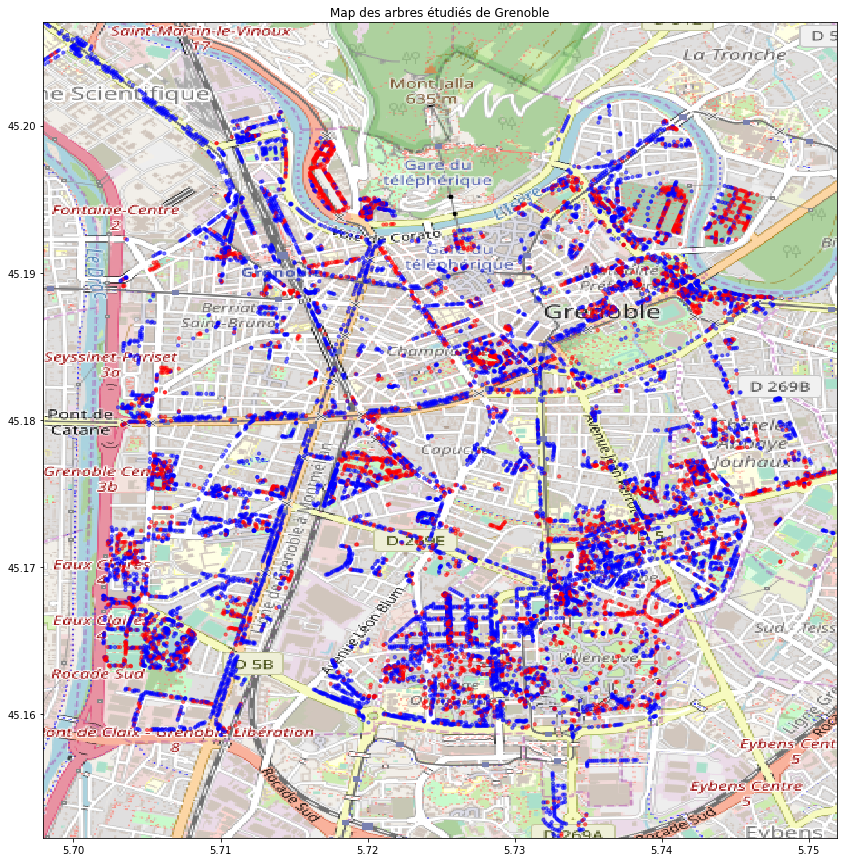

In [48]:
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(V_coords[:,0], V_coords[:,1], zorder=1, alpha= 0.5, c=C, s=10, marker='o')
ax.set_title('Map des arbres étudiés de Grenoble')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')